In [3]:
import lightgbm
import pandas as pd
import sklearn.metrics
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor


In [180]:
DATA_PATH = '/Users/carterdemars/Documents/open-climate-fix-project/datapipeline/processed_pv_data_jan1_2023.csv'


In [2]:
df = pd.read_csv(DATA_PATH)
df.shape


NameError: name 'pd' is not defined

In [182]:
df = df.convert_dtypes()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.index = df['timestamp']
df.drop(['timestamp'], axis=1, inplace=True)
df.dropna(axis=1, how='all', inplace=True)
df.dropna(axis=0, thresh=5, inplace=True)

In [183]:
test = df[df['system_id'] == 73911]
#test.index = test['timestamp']

In [184]:
#test.drop(['system_id', 'timestamp'], axis=1, inplace=True)

In [185]:
#test.dropna(subset=['cdir'], axis=0, inplace=True)
#test.dropna(axis=1, how='any', inplace=True)

In [186]:
df.head()

,system_id,instantaneous_power_W,temperature_C,voltage,alnid,alnip,aluvd,aluvp,bld,blh,...,tsr,tsrc,ttr,ttrc,u10,u100,u10n,uvb,v10,v100
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 09:00:00,10441,25.333333,<NA>,220.666667,0.185514,0.177517,0.042215,0.041346,605.5,82.217041,...,694252.125,860905.375,-950268.6875,-923276.625,-0.204135,0.685549,-0.236828,36905.359375,0.694137,1.303136
2022-01-01 10:00:00,10441,123.666667,<NA>,214.666667,0.185504,0.177508,0.042215,0.041346,584.8125,88.3479,...,1050763.875,1288547.5,-955879.0,-944538.3125,0.178086,0.248374,0.209821,79839.921875,0.63376,0.678995
2022-01-01 11:00:00,10441,231.333333,<NA>,222.333333,0.185504,0.177508,0.042215,0.041361,667.5,137.957764,...,1371358.375,1546461.5,-964899.8125,-957199.3125,0.909018,1.154768,1.050571,106877.046875,0.84011,0.957382
2022-01-01 12:00:00,10441,267.666667,<NA>,217.333333,0.185484,0.177488,0.042229,0.041361,688.1875,169.579102,...,1328789.875,1609242.625,-966673.25,-971190.875,1.026764,1.3436,1.17469,92890.90625,0.875265,1.058434
2022-01-01 13:00:00,10441,270.333333,<NA>,220.333333,0.185484,0.177488,0.042229,0.041375,584.8125,180.307617,...,1348226.5,1470102.0,-966383.375,-972247.125,0.669903,0.837759,0.781494,100856.03125,0.815653,0.957382


In [187]:
#x_vars = ['voltage', 'alnid', 'alnip', 'aluvd', 'aluvp', 'bld', 'blh', 'cape', 'cdir', 'cp', 'crr', 'csf']
#sns.pairplot(test, x_vars=x_vars, kind='scatter', y_vars=['instantaneous_power_W'])

In [1]:
opt_lgbm_params = {
 'subsample_freq': 1,
 'subsample': 1,
 'num_leaves': 30,
 'n_estimators': 300,
 'min_split_gain': 0.0001,
 'min_child_weight': 0,
 'min_child_samples': 20,
 'max_depth': 10,
 'learning_rate': 0.04,
 'colsample_bytree': 0.5,
 'colsample_bynode': 0.65,
 'objective': 'poisson'
}

In [189]:
mdl = LGBMRegressor(**opt_lgbm_params)

In [190]:
test.head()

,system_id,instantaneous_power_W,temperature_C,voltage,alnid,alnip,aluvd,aluvp,bld,blh,...,tsr,tsrc,ttr,ttrc,u10,u100,u10n,uvb,v10,v100
timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 07:00:00,73911,451.0,<NA>,230.2,0.151478,0.141984,0.060076,0.058872,1060.4375,30.267822,...,142338.75,136950.5,-947386.8125,-956938.6875,-0.782903,1.024302,-0.857424,9047.921875,-1.56577,-1.391568
2022-01-01 08:00:00,73911,386.666667,<NA>,230.166667,0.151478,0.141984,0.060076,0.058872,1474.0,40.673828,...,759583.0,756586.375,-965905.875,-970079.8125,-0.434193,1.300112,-0.471477,51941.46875,-1.820268,-1.866114
2022-01-01 09:00:00,73911,285.666667,<NA>,230.533333,0.151488,0.141984,0.060076,0.058872,1887.5625,68.665039,...,1370988.875,1376222.25,-987358.0,-987418.375,-0.118996,1.000269,-0.111802,105974.71875,-1.919621,-2.223756
2022-01-01 10:00:00,73911,275.333333,<NA>,230.433333,0.151488,0.141994,0.060076,0.058872,1908.25,120.614502,...,1827862.0,1841898.0,-1003472.6875,-1002054.625,0.315759,0.643205,0.321256,153297.90625,-1.743842,-2.372361
2022-01-01 11:00:00,73911,269.333333,<NA>,230.133333,0.151488,0.141994,0.060076,0.058887,1432.625,194.343506,...,2081425.875,2098425.0,-1009270.5625,-1006649.9375,0.918981,0.809148,0.740725,180302.21875,-1.584877,-2.259422


In [191]:
X = df.drop(['instantaneous_power_W'], axis=1).astype(float)
y = df['instantaneous_power_W'].astype(float).apply(lambda x: np.maximum(x, 0))
scores, maes, mses = [], [], []
for i in range(30):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    mdl.fit(X_train, y_train)
    scores.append(mdl.score(X_test, y_test))
    maes.append(sklearn.metrics.mean_absolute_error(y_test, mdl.predict(X_test)))
    mses.append(sklearn.metrics.mean_absolute_percentage_error(y_test, mdl.predict(X_test)))

(array([1., 0., 1., 0., 1., 1., 7., 4., 8., 7.]),
 array([0.77495115, 0.78731869, 0.79968622, 0.81205376, 0.8244213 ,
        0.83678884, 0.84915637, 0.86152391, 0.87389145, 0.88625899,
        0.89862652]),
 <BarContainer object of 10 artists>)

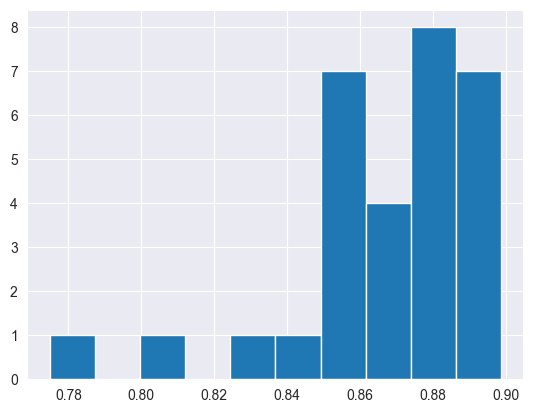

In [192]:
plt.hist(scores)

(array([3., 1., 3., 8., 4., 3., 2., 4., 1., 1.]),
 array([335.63797333, 345.92648792, 356.2150025 , 366.50351709,
        376.79203167, 387.08054626, 397.36906084, 407.65757543,
        417.94609001, 428.2346046 , 438.52311918]),
 <BarContainer object of 10 artists>)

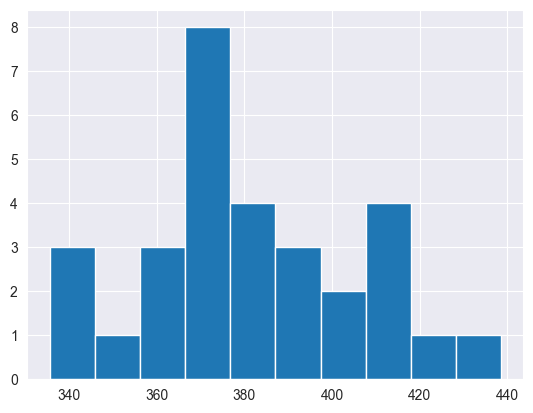

In [220]:
plt.hist(maes)

(array([514., 123.,  78.,  63.,  36.,  17.,   7.,   6.,   8.,   4.,   6.,
          7.,   2.,   1.,   6.,   3.,   0.,   2.,   3.,   1.,   1.,   0.,
          2.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   2.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.]),
 array([    0.        ,   530.26666667,  1060.53333333,  1590.8       ,
         2121.06666667,  2651.33333333,  3181.6       ,  3711.86666667,
         4242.13333333,  4772.4       ,  5302.66666667,  5832.93333333,
         6363.2       ,  6893.46666667,  7423.73333333,  7954.        ,
         8484.26666667,  9014.53333333,  9544.8       , 10075.06666667,
        10605.33333333, 11135.6       , 11665.86666667, 12196.13333333,
        12726.4       , 13256.66666667, 13786.93333333, 14317.2       ,
        14847.46666667, 15377.73333333, 15908.        , 16438.26666667,
        16968.53333333, 17498.8       , 18029.06666667, 18559.33333333,
        19

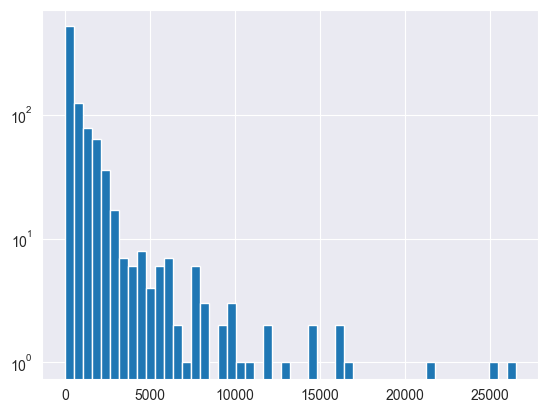

In [219]:
plt.yscale('log')
plt.hist(y_test, bins=50)

In [195]:
maes

[419.494846068401,
 370.36870896610446,
 382.4159751171172,
 367.32763665195426,
 360.84109695388145,
 342.96596949572546,
 407.75984878772,
 342.107014929874,
 385.9561321254047,
 438.5231191829468,
 369.23770809957153,
 355.87933144758887,
 367.81112067883055,
 394.73638933157594,
 335.63797333322293,
 368.5070089057978,
 409.6873562785312,
 360.0557486618177,
 381.3437922006744,
 413.9272984287992,
 399.8395701418714,
 376.65649371573625,
 357.6803632794265,
 385.1219302085512,
 389.1322194941305,
 411.68338688170405,
 370.4498622425841,
 400.4699673030371,
 391.0336295081449,
 369.89250558117]

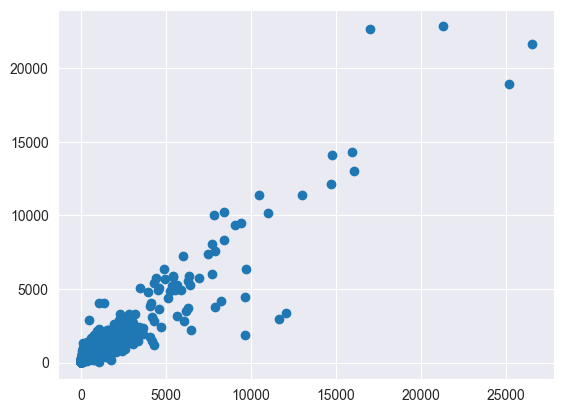

In [196]:
plt.scatter(y_test, mdl.predict(X_test))

In [197]:
sklearn.metrics.mean_absolute_percentage_error(y_test, mdl.predict(X_test))

8467419803874673.0

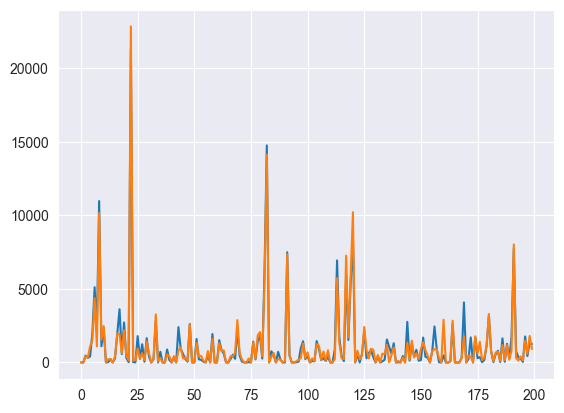

In [232]:
plt.plot(y_test.values[:200])
plt.plot(mdl.predict(X_test)[:200])

In [199]:
y[y <0]

Series([], Name: instantaneous_power_W, dtype: float64)

In [221]:
y_test.mean()

1155.0166852057841

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

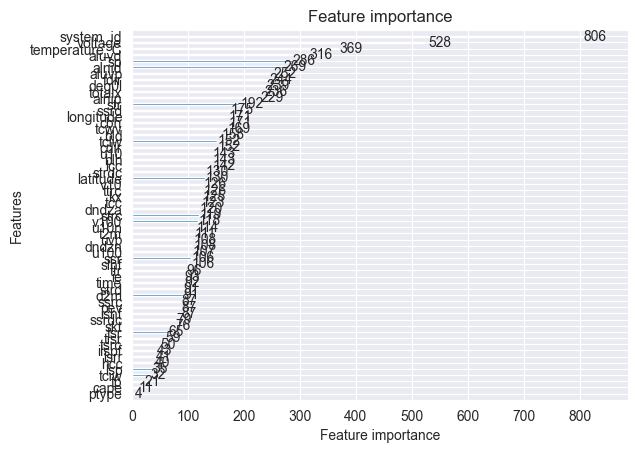

In [224]:
import lightgbm
lightgbm.plot_importance(mdl)

In [230]:
pd.DataFrame([mdl.feature_importances_, X_train.columns]).T.sort_values(by=0)

,0,1
31,0,mcc
14,0,csf
28,0,lsf
13,0,crr
12,0,cp
...,...,...
36,286,sp
5,316,aluvd
1,369,temperature_C
2,528,voltage


timestamp
2022-01-01 12:00:00    0.0
2022-01-01 15:00:00    0.0
2022-01-01 11:00:00    0.0
2022-01-01 16:00:00    0.0
2022-01-01 13:00:00    0.0
                      ... 
2022-01-01 16:00:00    0.0
2022-01-01 12:00:00    0.0
2022-01-01 09:00:00    0.0
2022-01-01 16:00:00    0.0
2022-01-01 10:00:00    0.0
Name: mcc, Length: 2097, dtype: float64